# Unit 5 - Financial Planning

- Author             : Kaleb Nunn
- Due                : 1/4/21
- Optional Challenge : Not completed


In [1]:
# Initial imports
import os
import requests
import datetime
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_value = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_value = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39069.60
The current value of your 5.3 ETH is $5768.94


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [32]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [38]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [37]:
# Format current date as ISO format
today = pd.Timestamp.now().isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Preview DataFrame
display(ticker_data)

AGG                                      \
                               open     high       low   close   volume   
time                                                                      
2020-08-12 00:00:00-04:00  118.7300  118.890  118.6500  118.76  9097248   
2020-08-13 00:00:00-04:00  118.7800  118.780  118.2400  118.32  5141695   
2020-08-14 00:00:00-04:00  118.4300  118.490  118.2300  118.23  4268992   
2020-08-17 00:00:00-04:00  118.3800  118.470  118.3050  118.33  7350320   
2020-08-18 00:00:00-04:00  118.4279  118.600  118.4200  118.54  6974488   
...                             ...      ...       ...     ...      ...   
2020-12-28 00:00:00-05:00  117.9700  118.045  117.8330  118.01  3503095   
2020-12-29 00:00:00-05:00  118.0600  118.060  117.9200  118.05  3255442   
2020-12-30 00:00:00-05:00  118.0900  118.120  117.9815  118.10  2593714   
2020-12-31 00:00:00-05:00  118.1800  118.240  118.1200  118.20  4325026   
2021-01-04 00:00:00-05:00  118.0800  118.140  117.9850  118.04  6211938   

                              SPY                                        
                             open      high       low   close    volume  
time                                                                     
2020-08-12 00:00:00-04:00  335.44  338.2800  332.8377  337.42  91230107  
2020-08-13 00:00:00-04:00  336.61  338.2514  335.8300  336.86  72475270  
2020-08-14 00:00:00-04:00  336.41  337.4200  335.6500  336.86  83898075  
2020-08-17 00:00:00-04:00  337.94  338.3400  336.8517  337.88  56151840  
2020-08-18 00:00:00-04:00  338.34  339.1000  336.6100  338.62  66539876  
...                           ...       ...       ...     ...       ...  
2020-12-28 00:00:00-05:00  371.74  372.5900  371.0700  372.14  31589494  
2020-12-29 00:00:00-05:00  373.81  374.0000  370.8300  371.48  45214280  
2020-12-30 00:00:00-05:00  372.34  373.1000  371.5700  371.93  40295732  
2020-12-31 00:00:00-05:00  371.78  374.6600  371.2320  373.85  52720911  
2021-01-04 00:00:00-05:00  375.31  375.4500  364.8200  368.85  92938087  

[100 rows x 10 columns]

In [9]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data['AGG']['close']
spy_close_price = ticker_data['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $time
2020-08-12 00:00:00-04:00    118.76
2020-08-13 00:00:00-04:00    118.32
2020-08-14 00:00:00-04:00    118.23
2020-08-17 00:00:00-04:00    118.33
2020-08-18 00:00:00-04:00    118.54
                              ...  
2020-12-28 00:00:00-05:00    118.01
2020-12-29 00:00:00-05:00    118.05
2020-12-30 00:00:00-05:00    118.10
2020-12-31 00:00:00-05:00    118.20
2021-01-04 00:00:00-05:00    118.04
Name: close, Length: 100, dtype: float64
Current SPY closing price: $time
2020-08-12 00:00:00-04:00    337.42
2020-08-13 00:00:00-04:00    336.86
2020-08-14 00:00:00-04:00    336.86
2020-08-17 00:00:00-04:00    337.88
2020-08-18 00:00:00-04:00    338.62
                              ...  
2020-12-28 00:00:00-05:00    372.14
2020-12-29 00:00:00-05:00    371.48
2020-12-30 00:00:00-05:00    371.93
2020-12-31 00:00:00-05:00    373.85
2021-01-04 00:00:00-05:00    368.85
Name: close, Length: 100, dtype: float64


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price.iloc[-1]
my_agg_value = my_agg * agg_close_price.iloc[-1]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18442.50
The current value of your 200 AGG shares is $23608.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(
    [my_btc_value + my_eth_value, my_spy_value + my_agg_value],
    index   = ['crypto', 'shares'],
    columns = ['amount']
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,44838.544
shares,42050.500


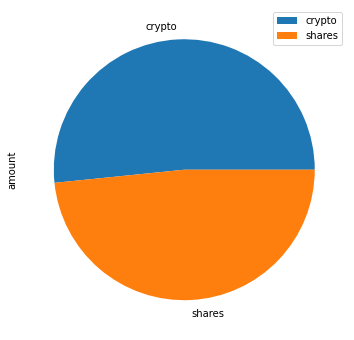

In [12]:
# Plot savings pie chart
plot = df_savings.plot.pie(y='amount', figsize=(11,6))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
current_savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value

# Validate saving health
if current_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund!')
elif current_savings == emergency_fund:
    print('Congratulations! You finally saved enough to pay for emergencies!')
else:
    print(f'Oh no! You still need to save: ${emergency_fund - current_savings}!')

Congratulations! You have enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    ['SPY', 'AGG'],
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
display(df_stock_data.head())

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc = MCSimulation(df_stock_data, weights = [.4, .6], num_simulation=500, num_trading_days=252*30)

In [17]:
# Printing the simulation input data
display(mc.portfolio_data.head())

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012221,1.009929,0.999259,0.998958,1.011944,1.010830,0.998113,0.998293,0.996189,0.994352,...,1.001435,1.005613,1.002095,0.998783,1.002339,1.002857,1.001561,1.000242,0.996988,0.987534
2,1.020453,1.009753,1.001417,1.005281,1.010388,1.012384,1.019958,0.995634,0.998006,0.998333,...,1.001629,0.999507,0.989927,1.008827,1.006424,0.995667,0.999152,0.998035,0.999373,0.983589
3,1.021859,1.004273,0.991958,1.013463,1.000678,1.003995,1.022914,1.000773,1.004759,1.003255,...,0.996357,1.000388,0.998679,1.009637,1.003021,0.993363,1.001778,1.010679,0.996489,0.974084
4,1.016030,0.994228,0.986687,1.008852,1.006846,0.999641,1.033998,1.005234,0.997788,0.996656,...,1.007458,0.993822,0.993573,1.016720,1.004506,0.996095,0.980741,1.007095,0.996176,0.976033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.015890,12.821346,2.909764,7.694576,9.063683,3.781468,6.473930,10.612607,15.968150,5.310597,...,8.035249,12.891962,13.037555,32.442852,14.447586,3.640126,3.577631,2.889828,16.858349,6.849155
7557,5.013852,12.882665,2.919657,7.766502,9.091958,3.769506,6.392919,10.576281,15.932824,5.263157,...,8.088126,13.014949,13.113546,32.591303,14.544724,3.651101,3.592259,2.883390,17.056898,6.829478
7558,5.002254,12.751167,2.952489,7.812911,9.042379,3.787071,6.456630,10.606929,15.958452,5.239121,...,8.084613,13.026951,13.002990,32.675458,14.576266,3.641951,3.672841,2.904467,17.036755,6.790960
7559,5.021829,12.814644,2.985697,7.898622,9.058973,3.814599,6.439539,10.640078,15.953945,5.220165,...,8.043751,13.009460,12.978570,32.226736,14.514946,3.622654,3.717688,2.886875,17.166365,6.770395


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

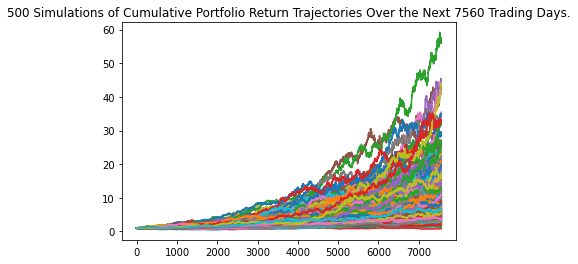

In [19]:
# Plot simulation outcomes
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

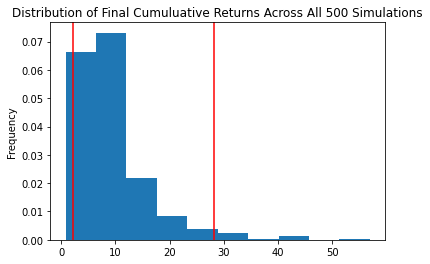

In [20]:
# Plot probability distribution and confidence intervals
mc.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              9.520582
std               6.944813
min               0.823721
25%               4.982961
50%               7.829956
75%              11.607173
max              56.896336
95% CI Lower      2.223140
95% CI Upper     28.234094
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = summary_stats['95% CI Lower'] * initial_investment
ci_upper = summary_stats['95% CI Upper'] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44462.7997201875 and $564681.8825661516


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = summary_stats['95% CI Lower'] * initial_investment
ci_upper = summary_stats['95% CI Upper'] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $66694.19958028125 and $847022.8238492273


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")